In [1]:
"""

"""


import pandas as pd
import matplotlib.pyplot as plt

import __init__

from db.pgdf import PgDf
from db.postgresql import PostgreSqlDB

d = PostgreSqlDB()
pg = PgDf()

df = pg.read_sql("""SELECT 
CASE WHEN t.result = 'lose' THEN -1
    WHEN t.result = 'win' THEN 1
    ELSE 0
END AS result,
t.profit/20000 as profit,
ABS(t.takeprofit_price - t.open_price)/ABS(t.stoploss_price - t.open_price) as ts_rate,
z.*
FROM zz_strtg_params as z
JOIN bk2_trades as t ON t.order_id = z.order_id
WHERE t.trade_name = 'zzanal'
AND abs(t.profit) > 0
;""")



In [2]:
df.columns

Index(['result', 'profit', 'ts_rate', 'order_id', 'codename', 'ep', 'dt',
       'price', 'trend', 'vol_rank', 'trade_pos_key', 'tp_diff',
       'prefer_recent_peaks', 'mado', 'trend_rate', 'long_candle', 'chiko',
       'len_std', 'hara_rate', 'up_hige_rate', 'dw_hige_rate', 'len_avg',
       'reversed_cnt'],
      dtype='object')

In [3]:
print("total: %d" % len(df))
print("lose:  %d" % len(df[df.result == -1]))
print("profit total: %f" % df.profit.sum())

total: 377
lose:  121
profit total: -8.184781


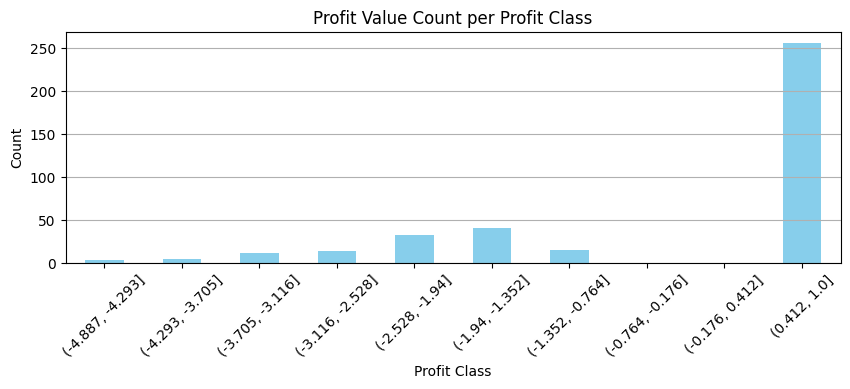

In [4]:
# Classify profit values into 10 classes
df['profit_class'] = pd.cut(df['profit'], bins=10)

# Count the profit values per class
profit_class_counts = df['profit_class'].value_counts().sort_index()

# Plot the result
plt.figure(figsize=(10, 3))
profit_class_counts.plot(kind='bar', color='skyblue')
plt.title('Profit Value Count per Profit Class')
plt.xlabel('Profit Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

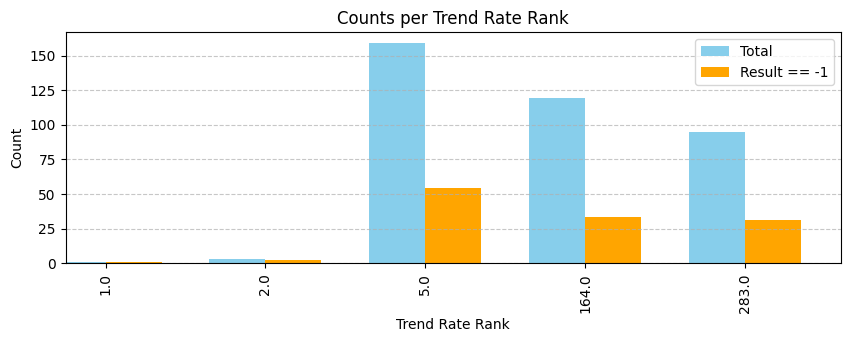

In [5]:
# Rank the trend_rate column
df['rank'] = df['trend_rate'].rank(method='min')

# Count occurrences of each rank
total_rank_counts = df['rank'].value_counts().sort_index()

# Filter DataFrame where result == -1 and count occurrences of each rank
df_filtered = df[df['result'] == -1]
filtered_rank_counts = df_filtered['rank'].value_counts().sort_index()

# Align both series to have the same index
combined_counts = pd.concat([total_rank_counts, filtered_rank_counts], axis=1, keys=['Total', 'Result -1']).fillna(0)

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 3))
width = 0.35  # the width of the bars

# Plotting the total counts
combined_counts['Total'].plot(kind='bar', color='skyblue', width=width, position=1, label='Total', ax=ax)

# Plotting the counts where result == -1
combined_counts['Result -1'].plot(kind='bar', color='orange', width=width, position=0, label='Result == -1', ax=ax)

plt.title('Counts per Trend Rate Rank')
plt.xlabel('Trend Rate Rank')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

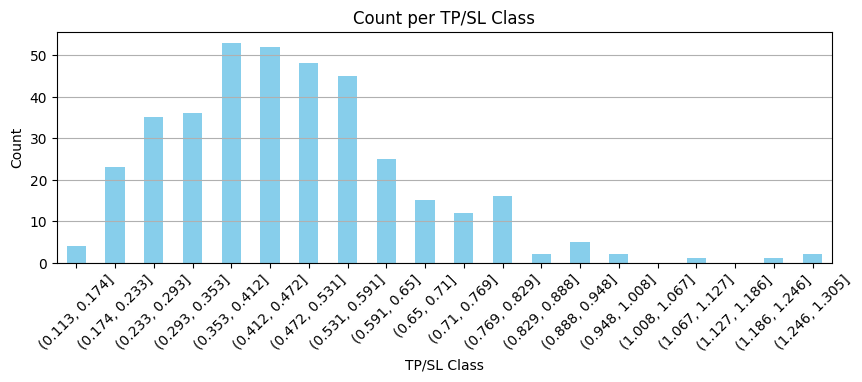

In [8]:
# Classify profit values into 10 classes
df['profit_class'] = pd.cut(df['ts_rate'], bins=20)

# Count the profit values per class
profit_class_counts = df['profit_class'].value_counts().sort_index()

# Plot the result
plt.figure(figsize=(10, 3))
profit_class_counts.plot(kind='bar', color='skyblue')
plt.title('Count per TP/SL Class')
plt.xlabel('TP/SL Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()